In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Wstęp
## 1.1 Opis źródła danych

Dane użyte do wizualizacji pochodzą ze strony [Kaggle - HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/code/joshuaswords/awesome-hr-data-visualization-prediction/data). Przedstawiają one dane pewnej firmy działającej w obszarze data science, która zgromadziła dane osób, które pomyślnie zakończyły przygotowane przez nią kursy, wraz z informacjami o tym czy dana osoba aktywnie poszukuje pracy (lub nie) oraz jakie czynniki wpływają na daną decyzję. Dokładne pochodzenie zbioru nie jest podane, natomiast udostępniony jest w domenie publicznej oraz jego struktura jest bardzo ciekawa do zastosowania wizualizacji danych. W praktyce gospodarczej tego typu zestawem danych mogłyby się posługiwać kierownictwa firm, aby zbadać czynniki wpływające na decyzję pracowników o zmianie swojego pracodawcy lub też działy rekrutacji w poszukiwaniu nowych, potencjalnych kandydatów. Domyślnym przeznaczeniem danych jest budowanie modeli klasyfikacyjnych.

## 1.2 Opis zmiennych

Dane użyte w zestawie ``hr_data`` posiadają następujące attrybuty, wraz z przykładami wartości:

- enrolee_id - id_osoby
- city - zakodowana zmienna miasta, np. *city_21*
- city_development_index - wskaźnik rozwoju miasta (od 0 do 1)
- gender - płeć
- relevant_experience - istotne doświadczenie: posiada/nie posiada
- enrolled_university - typ studiów: *Part time*/*Full time* (jeżeli studiował)
- education_level - poziom wykształcenia: od *Primary School* aż do *PhD*
- major_discipline - dysciplina naukowa, np. *STEM* (nauka, technologia, inżynieria, matematyka)
- experience - doświadczenie liczone w latach
- company_size - wielkość firmy, np. *50-99*
- company_type - typ firmy, np. *Pvt Ltd*
- last_new_job - różnica lat pomiędzy poprzednią pracą, a obecną
- training_hours - ilość ukończonych godzin szkoleniowych
- target - zmienna binarna: 1 - *szuka pracy*, 0 - *nie szuka pracy*

# 2. Import i preprocessing danych

In [2]:
data = pd.read_csv('hr_data.csv').drop('enrollee_id', axis=1)
# Przetłumaczenie nazw zmiennych na Polski - dla wygody i lepszej wizualizacji
data.rename(columns={
    'city': 'Miasto',
    'city_development_index': 'Wskaźnik rozwoju miasta',
    'gender': 'Płeć',
    'relevent_experience': 'Istotne doświadczenie',
    'enrolled_university': 'Rodzaj studiów',
    'education_level': 'Poziom wykształcenia',
    'major_discipline': 'Dyscyplina naukowa',
    'experience': 'Doświadczenie',
    'company_size': 'Wielkość firmy',
    'company_type': 'Typ firmy',
    'last_new_job': 'Czas od ostatniej zmiany pracy',
    'training_hours': 'Ilość godzin szkoleniowych',
    'target': 'Czy poszukuje pracy?'
}, inplace=True)
#Zmiana kodowania zmiennej `Czy poszukuje pracy?`
data['Czy poszukuje pracy?'] = data['Czy poszukuje pracy?'].apply(
    lambda x: 'Poszukuje' if x == 1.0 else 'Nie poszukuje')
data.head()

,Miasto,Wskaźnik rozwoju miasta,Płeć,Istotne doświadczenie,Rodzaj studiów,Poziom wykształcenia,Dyscyplina naukowa,Doświadczenie,Wielkość firmy,Typ firmy,Czas od ostatniej zmiany pracy,Ilość godzin szkoleniowych,Czy poszukuje pracy?
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,Poszukuje
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,Nie poszukuje
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,Nie poszukuje
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,Poszukuje
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,Nie poszukuje


In [3]:
# Sprawdzenie czy występują obserwacje puste (NaN)
print(round(data.isna().sum()/len(data),2))

Miasto                            0.00
Wskaźnik rozwoju miasta           0.00
Płeć                              0.24
Istotne doświadczenie             0.00
Rodzaj studiów                    0.02
Poziom wykształcenia              0.02
Dyscyplina naukowa                0.15
Doświadczenie                     0.00
Wielkość firmy                    0.31
Typ firmy                         0.32
Czas od ostatniej zmiany pracy    0.02
Ilość godzin szkoleniowych        0.00
Czy poszukuje pracy?              0.00
dtype: float64


Ze względu na dużą liczbę obserwacji pustych w zmiennych: `Typ firmy`, `Wielkość firmy`, `Płeć` oraz `Dyscyplina naukowa`, zdecydowano się im bliżej przyjżeć oraz podjąć odpowiednie kroki.

In [4]:
for i in ['Typ firmy', 'Wielkość firmy', 'Płeć', 'Dyscyplina naukowa']:
    print(f"Zmienna `{i}`: {list(data[i].unique())}")

Zmienna `Typ firmy`: [nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other', 'Public Sector', 'NGO']
Zmienna `Wielkość firmy`: [nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49', '100-500', '500-999']
Zmienna `Płeć`: ['Male', nan, 'Female', 'Other']
Zmienna `Dyscyplina naukowa`: ['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major', 'Other']


In [5]:
# Zmienna `Typ firmy`: NaN zamienione na 'Nie podano'
data['Typ firmy'].fillna('Nie podano',inplace=True)
# Zmienna `Wielkość firmy`: NaN na 'Inne'
data['Wielkość firmy'].fillna('Inne',inplace=True)
# Zmienna `Płeć`: NaN na 'Nie podano'
data['Płeć'].fillna('Nie podano',inplace=True)
# Zmienna `Dyscyplina naukowa`:
data['Dyscyplina naukowa'].fillna('Nie podano',inplace=True)

# Dalsze preparowanie danych...
data.loc[data['Wielkość firmy'] == '10/49', 'Wielkość firmy'] = '10-49'
data.loc[data['Doświadczenie'] == '<1', 'Doświadczenie'] = '0'
data.loc[data['Doświadczenie'] == '>20', 'Doświadczenie'] = '20'
#data['Doświadczenie'] = data['Doświadczenie'].astype('int')

# Usunięcie pozostałych obserwacji odstających
data.dropna(inplace=True)

# 2. Wizualizacje wraz z najważniejszymi wnioskami
## 2.1 Osoby poszukujące vs. nie poszukujące pracy w obszarze Data Science

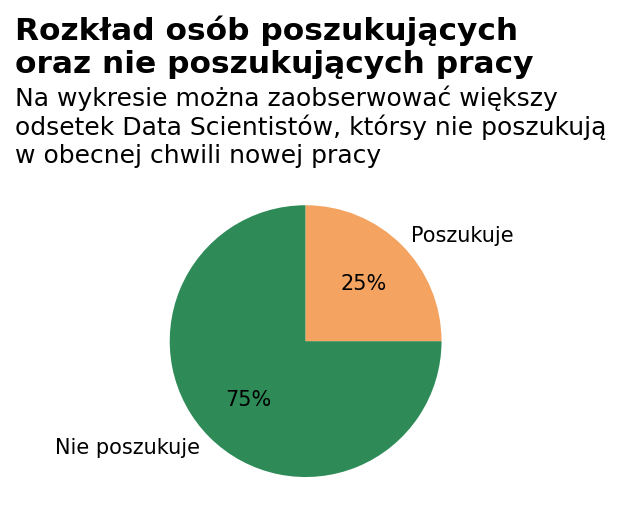

In [6]:
import matplotlib.pyplot as plt
x=data['Czy poszukuje pracy?'].value_counts()
y=len(data)
percent=((x/y)).round(2)

fig, ax = plt.subplots(1,1,figsize=(5, 3),dpi=150)
background_color = "white"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
# Plot the pie chart
ax.pie(percent.values, labels=percent.index, autopct='%1.f%%', startangle=90, colors=['seagreen','sandybrown'])
 
# Equal aspect ratio ensures that pie is drawn as a circle.
# plt.axis('equal')
# plt.figtext(0.43, 0.9, "Osoby poszukujące", fontsize='large', color='r', ha ='right')
# plt.figtext(0.51, 0.9, "osoby nie poszukujące", fontsize='large', color='b', ha ='left')
# plt.figtext(0.49, 0.9, ' oraz ', fontsize='large', color='k', ha ='center')
fig.text(0.125,1.1,'Rozkład osób poszukujących\noraz nie poszukujących pracy',fontsize=15, fontweight='bold')
fig.text(0.125,0.9,'Na wykresie można zaobserwować większy\nodsetek Data Scientistów, którsy nie poszukują\nw obecnej chwili nowej pracy',fontsize=12) 
# Display the graph onto the screen
plt.show()

## 2.2 Rozkłady zmiennych w zbiorze danych

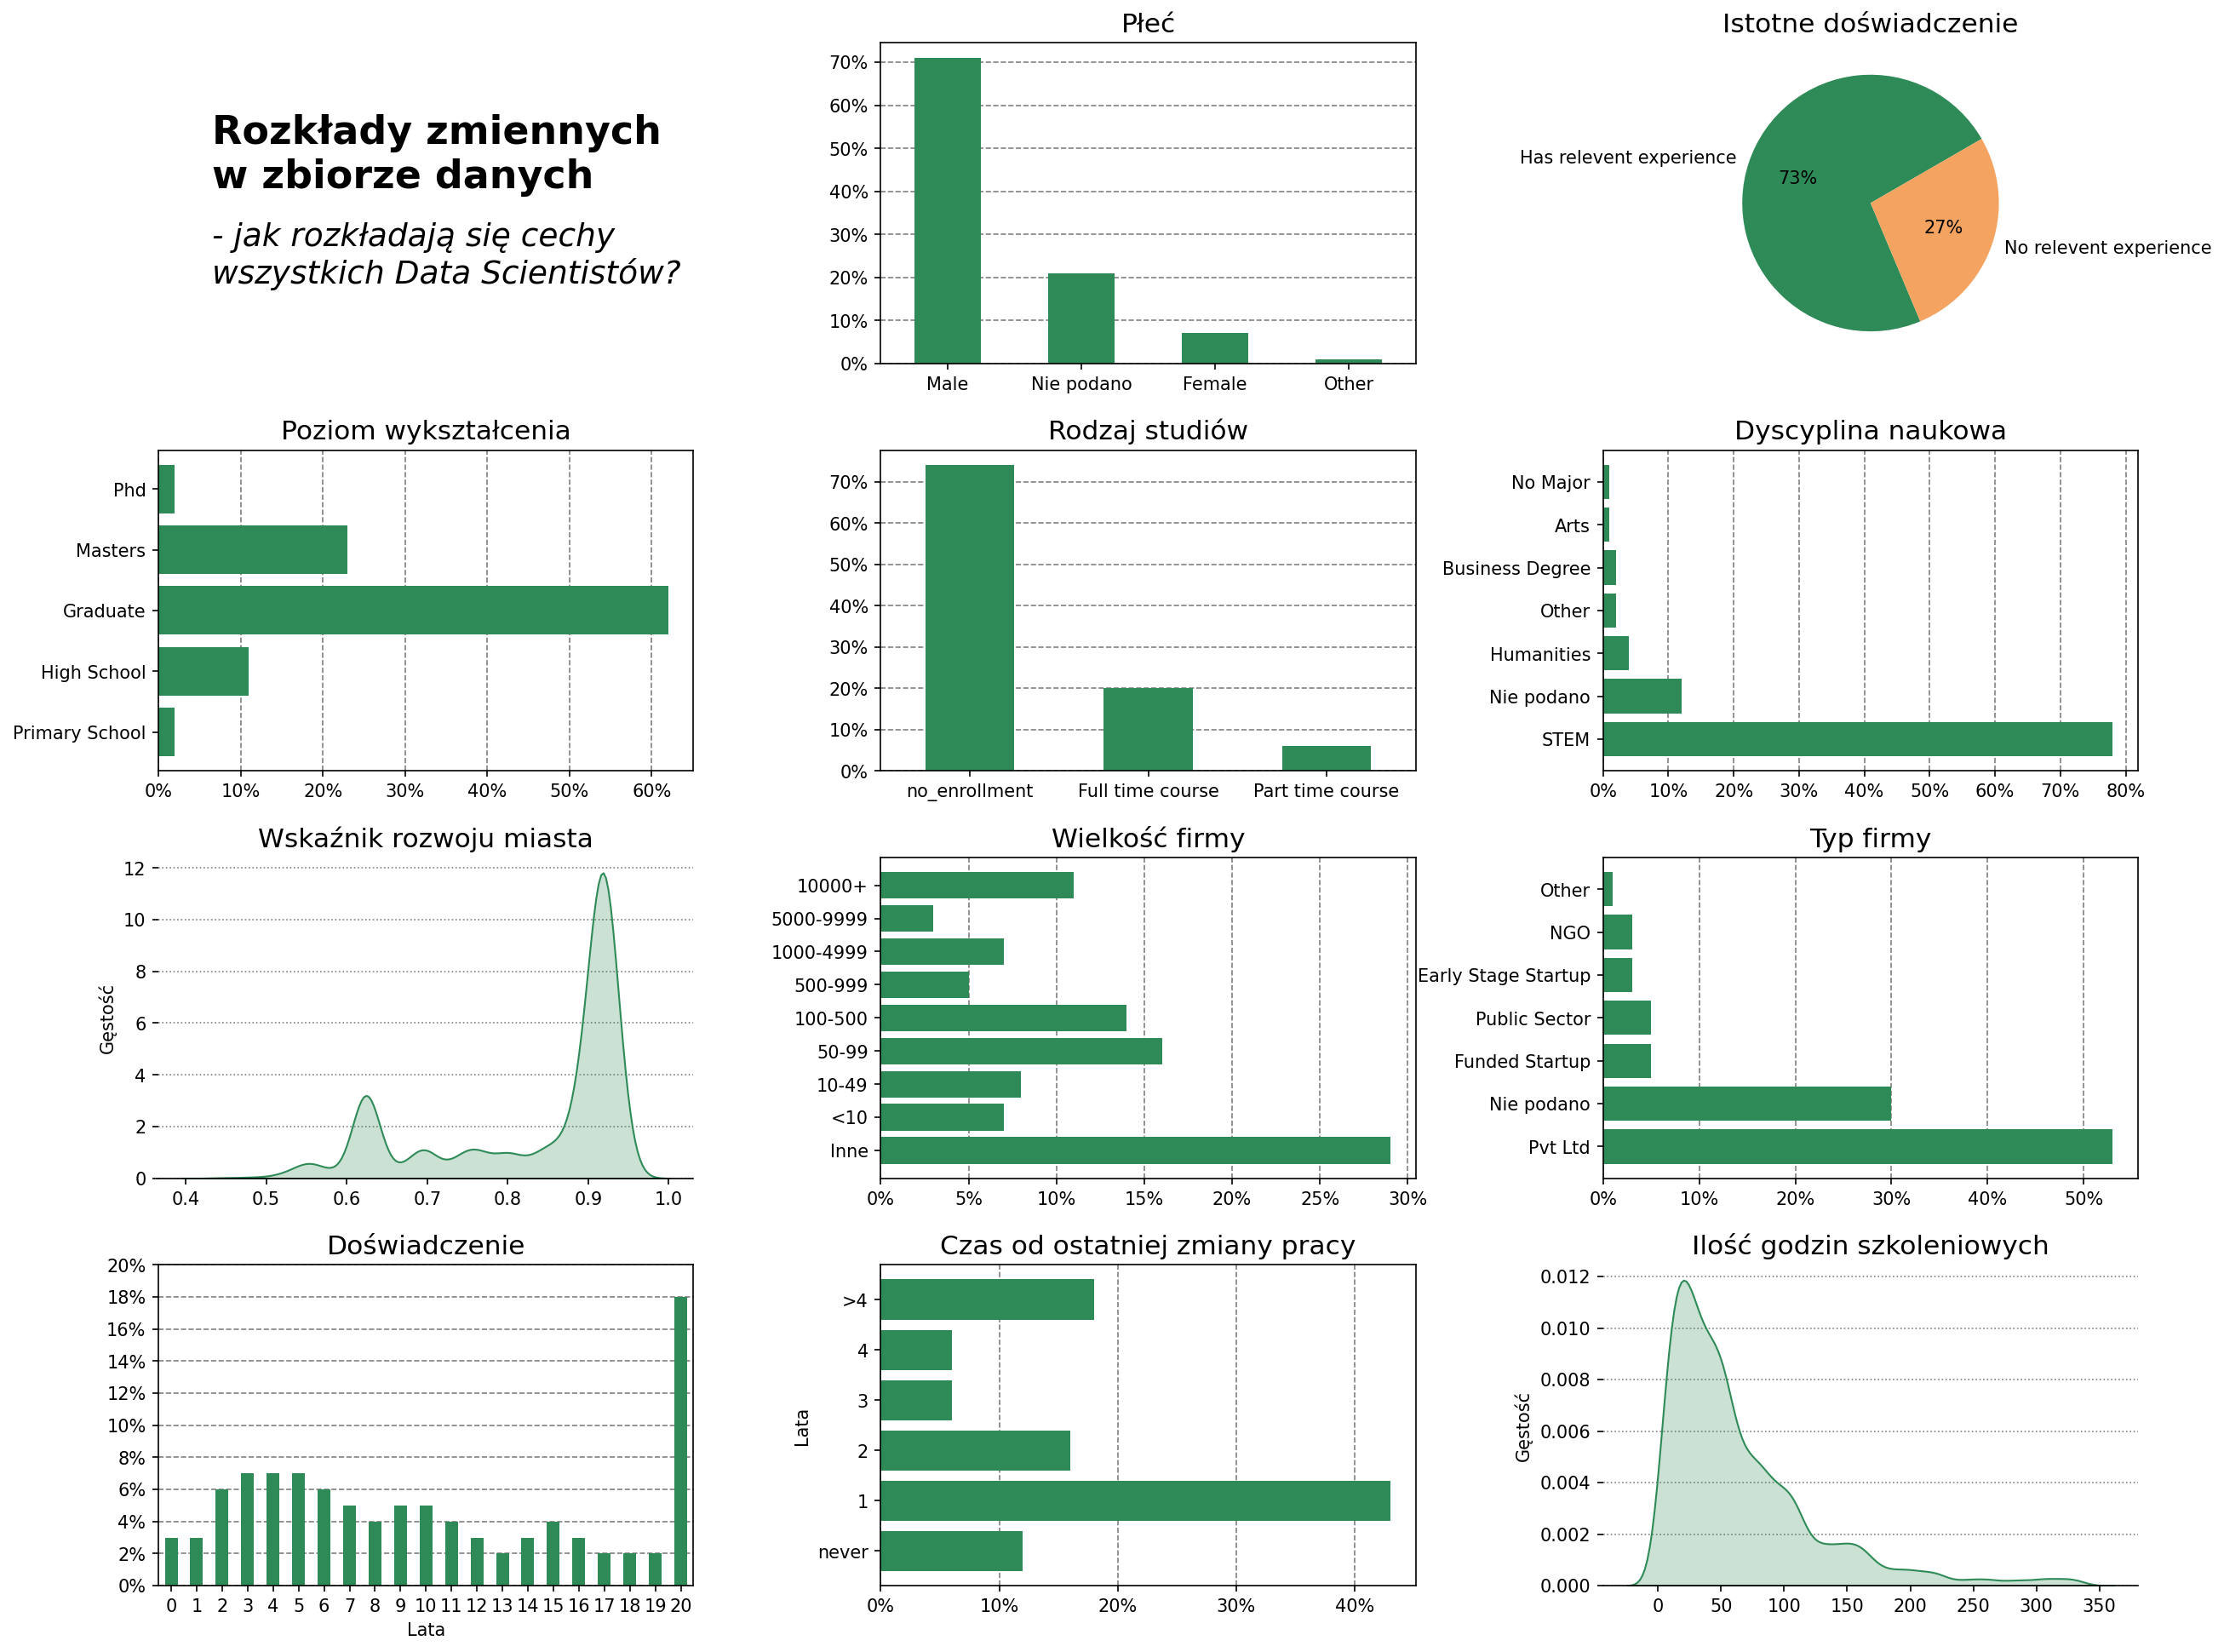

In [7]:
fig = plt.figure(figsize=(20,16),dpi=150)
fig.patch.set_facecolor('white')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
ax9 = fig.add_subplot(gs[3, 0])
ax10 = fig.add_subplot(gs[3, 1])
ax11 = fig.add_subplot(gs[3, 2])

# ax0 - tytuł wykresu jako jeden z ax
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.1, 0.65, 'Rozkłady zmiennych\nw zbiorze danych',
         horizontalalignment='left', verticalalignment='center', fontsize=22,
         fontweight='bold', color="black")
ax0.text(0.1,0.25,"- jak rozkładają się cechy\nwszystkich Data Scientistów?", style='italic',
         fontsize=18, color='black')
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

# ax1 - płeć
x=data['Płeć'].value_counts()
y=len(data)
percent=((x/y)).round(2)*100
percent.plot.bar(x=percent.index, y=percent, color='seagreen', ax=ax1)
ax1.grid(axis='y', color='grey', linestyle='--')
ax1.set_title('Płeć', fontsize=15)
ax1.set_yticks([i for i in range(0,71,10)], [f'{i}%' for i in range(0,71,10)])
ax1.tick_params(labelrotation=0)
ax1.set_axisbelow(True)


# ax2 - istotne doświadczenie
x=data['Istotne doświadczenie'].value_counts()
y=len(data)
percent=((x/y)).round(2)*100
ax2.pie(percent, labels=percent.index,
        autopct='%1.f%%', startangle=30,
        colors=['seagreen','sandybrown'])
ax2.set_title('Istotne doświadczenie', fontsize=15)
ax2.spines["bottom"].set_visible(True)
ax2.spines["top"].set_visible(True)
ax2.spines["left"].set_visible(True)
ax2.spines["right"].set_visible(True)

# ax3 - poziom wykształcenia
x=data['Poziom wykształcenia'].value_counts()
y=len(data)
percent=pd.DataFrame(((x/y)).round(2)*100)
custom_order = {'Primary School': 0, 'High School': 1, 'Graduate': 2, 'Masters': 3, 'Phd': 4}
percent['typ'] = percent.index
percent.sort_values(by='typ', key=lambda x: x.map(custom_order), inplace=True)
percent.drop('typ', axis=1, inplace=True)
ax3.barh(percent.index, percent['Poziom wykształcenia'], color='seagreen')
ax3.set_xticks([i for i in range(0,61,10)], [f'{i}%' for i in range(0,61,10)])
ax3.grid(axis='x', color='grey', linestyle='--')
ax3.set_title('Poziom wykształcenia', fontsize=15)
ax3.set_axisbelow(True)

# ax4 - Rodzaj studiów
x=data['Rodzaj studiów'].value_counts()
y=len(data)
percent=pd.DataFrame(((x/y)).round(2)*100)
custom_order = {'no_enrollment': 0, 'Full time course': 1, 'Part time course': 2}
percent['typ'] = percent.index
percent.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent.drop('typ', axis=1, inplace=True)
percent = percent['Rodzaj studiów']
percent.plot.bar(x=percent.index, y=percent, color='seagreen', ax=ax4)
ax4.grid(axis='y', color='grey', linestyle='--')
ax4.set_title('Rodzaj studiów', fontsize=15)
ax4.set_yticks([i for i in range(0,71,10)], [f'{i}%' for i in range(0,71,10)])
ax4.tick_params(labelrotation=0)
ax4.set_axisbelow(True)

# ax5 - Dyscyplina naukowa
x=data['Dyscyplina naukowa'].value_counts()
y=len(data)
percent=((x/y)).round(2)*100
ax5.barh(percent.index, percent, color='seagreen')
ax5.set_xticks([i for i in range(0,81,10)], [f'{i}%' for i in range(0,81,10)])
ax5.grid(axis='x', color='grey', linestyle='--')
ax5.set_axisbelow(True)
ax5.set_title('Dyscyplina naukowa', fontsize=15)
ax5.set_axisbelow(True)

# ax6 Wskaźnik rozwoju miasta
sns.distplot(data['Wskaźnik rozwoju miasta'], color='seagreen', hist=False,kde_kws={"shade": True}, ax=ax6)
ax6.set_title('Wskaźnik rozwoju miasta', fontsize=15)
ax6.set_ylabel('Gęstość')
ax6.spines["top"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["right"].set_visible(False)
ax6.grid(axis='y', color='grey', linestyle=':')
ax6.set_xlabel('')
ax6.set_axisbelow(True)

# ax7 Wielkość firmy
x=data['Wielkość firmy'].value_counts()
y=len(data)
percent=pd.DataFrame(((x/y)).round(2)*100)
custom_order = {'Inne': 0, '<10': 1, '10-49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6,
         '5000-9999': 7, '10000+': 8}
percent['typ'] = percent.index
percent.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent.drop('typ', axis=1, inplace=True)
ax7.barh(percent.index, percent['Wielkość firmy'], color='seagreen')
ax7.set_xticks([i for i in range(0,35,5)], [f'{i}%' for i in range(0,35,5)])
ax7.grid(axis='x', color='grey', linestyle='--')
ax7.set_title('Wielkość firmy', fontsize=15)
ax7.set_axisbelow(True)

# ax8 Typ firmy
x=data['Typ firmy'].value_counts()
y=len(data)
percent=((x/y)).round(2)*100
ax8.barh(percent.index, percent, color='seagreen')
ax8.set_title('Typ firmy', fontsize=15)
ax8.grid(axis='x', color='grey', linestyle='--')
ax8.set_xticks([i for i in range(0,51,10)], [f'{i}%' for i in range(0,51,10)])
ax8.set_axisbelow(True)

# ax9 Doświadczenie
x=data['Doświadczenie'].value_counts()
y=len(data)
percent=pd.DataFrame(((x/y)).round(2)*100)
custom_order = {str(i): j for (i, j) in enumerate(range(0,21,1))}
percent['typ'] = percent.index
percent.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent.drop('typ', axis=1, inplace=True)
percent = percent['Doświadczenie']
percent.plot.bar(percent.index, percent, color='seagreen', ax=ax9)
ax9.tick_params(labelrotation=0)
ax9.set_xlabel('Lata')
ax9.set_yticks([i for i in range(0, 21, 2)], [f'{i}%' for i in range(0, 21, 2)])
ax9.grid(axis='y', color='grey', linestyle='--')
ax9.set_title('Doświadczenie', fontsize=15)
ax9.set_axisbelow(True)


# ax10 - ostatnia praca
x=data['Czas od ostatniej zmiany pracy'].value_counts()
y=len(data)
percent=pd.DataFrame(((x/y)).round(2)*100)
custom_order={'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5}
percent['typ'] = percent.index
percent.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent.drop('typ', axis=1, inplace=True)
ax10.barh(percent.index, percent['Czas od ostatniej zmiany pracy'], color='seagreen')
#ax10.set_xticks([i for i in range(0,35,5)], [f'{i}%' for i in range(0,35,5)])
ax10.set_title('Czas od ostatniej zmiany pracy', fontsize=15)
ax10.grid(axis='x', color='grey', linestyle='--')
ax10.set_xticks([i for i in range(0,41,10)], [f'{i}%' for i in range(0,41,10)])
ax10.set_ylabel('Lata')
ax10.set_axisbelow(True)

# ax11 - ilość godzin szkoleniowych
sns.distplot(data['Ilość godzin szkoleniowych'], color='seagreen', hist=False, kde_kws={"shade": True}, ax=ax11)
ax11.set_title('Ilość godzin szkoleniowych', fontsize=15)
ax11.set_ylabel('Gęstość')
ax11.spines["top"].set_visible(False)
ax11.spines["left"].set_visible(False)
ax11.spines["right"].set_visible(False)
ax11.grid(axis='y', color='grey', linestyle=':')
ax11.set_xlabel('')
ax11.set_axisbelow(True)
plt.show()

Najważniejsze obserwacje:
- ze względu na płeć najczęściej Data Scientistami są mężczyźni
- oczywistym jest, iż większość Data Scientistów ma background w dziedzinie nauk STEM (Sciences, Technology, Engineering, Mathematics)
- w zbiorze danych najczęściej występują doświadczeni pracownicy, z doświadczeniem równym bądź większym 20 lat pracy
- Data Scientiści często zmieniają pracę - najwięcej osób zmieniło pracę zaledwie rok temu
- Data Scientiści znajdują się w dobrze rozwiniętych miastach

## 2.3 Rozkłady wybranych zmiennych w ujęciu na osoby poszukujące i nie poszukujące pracy

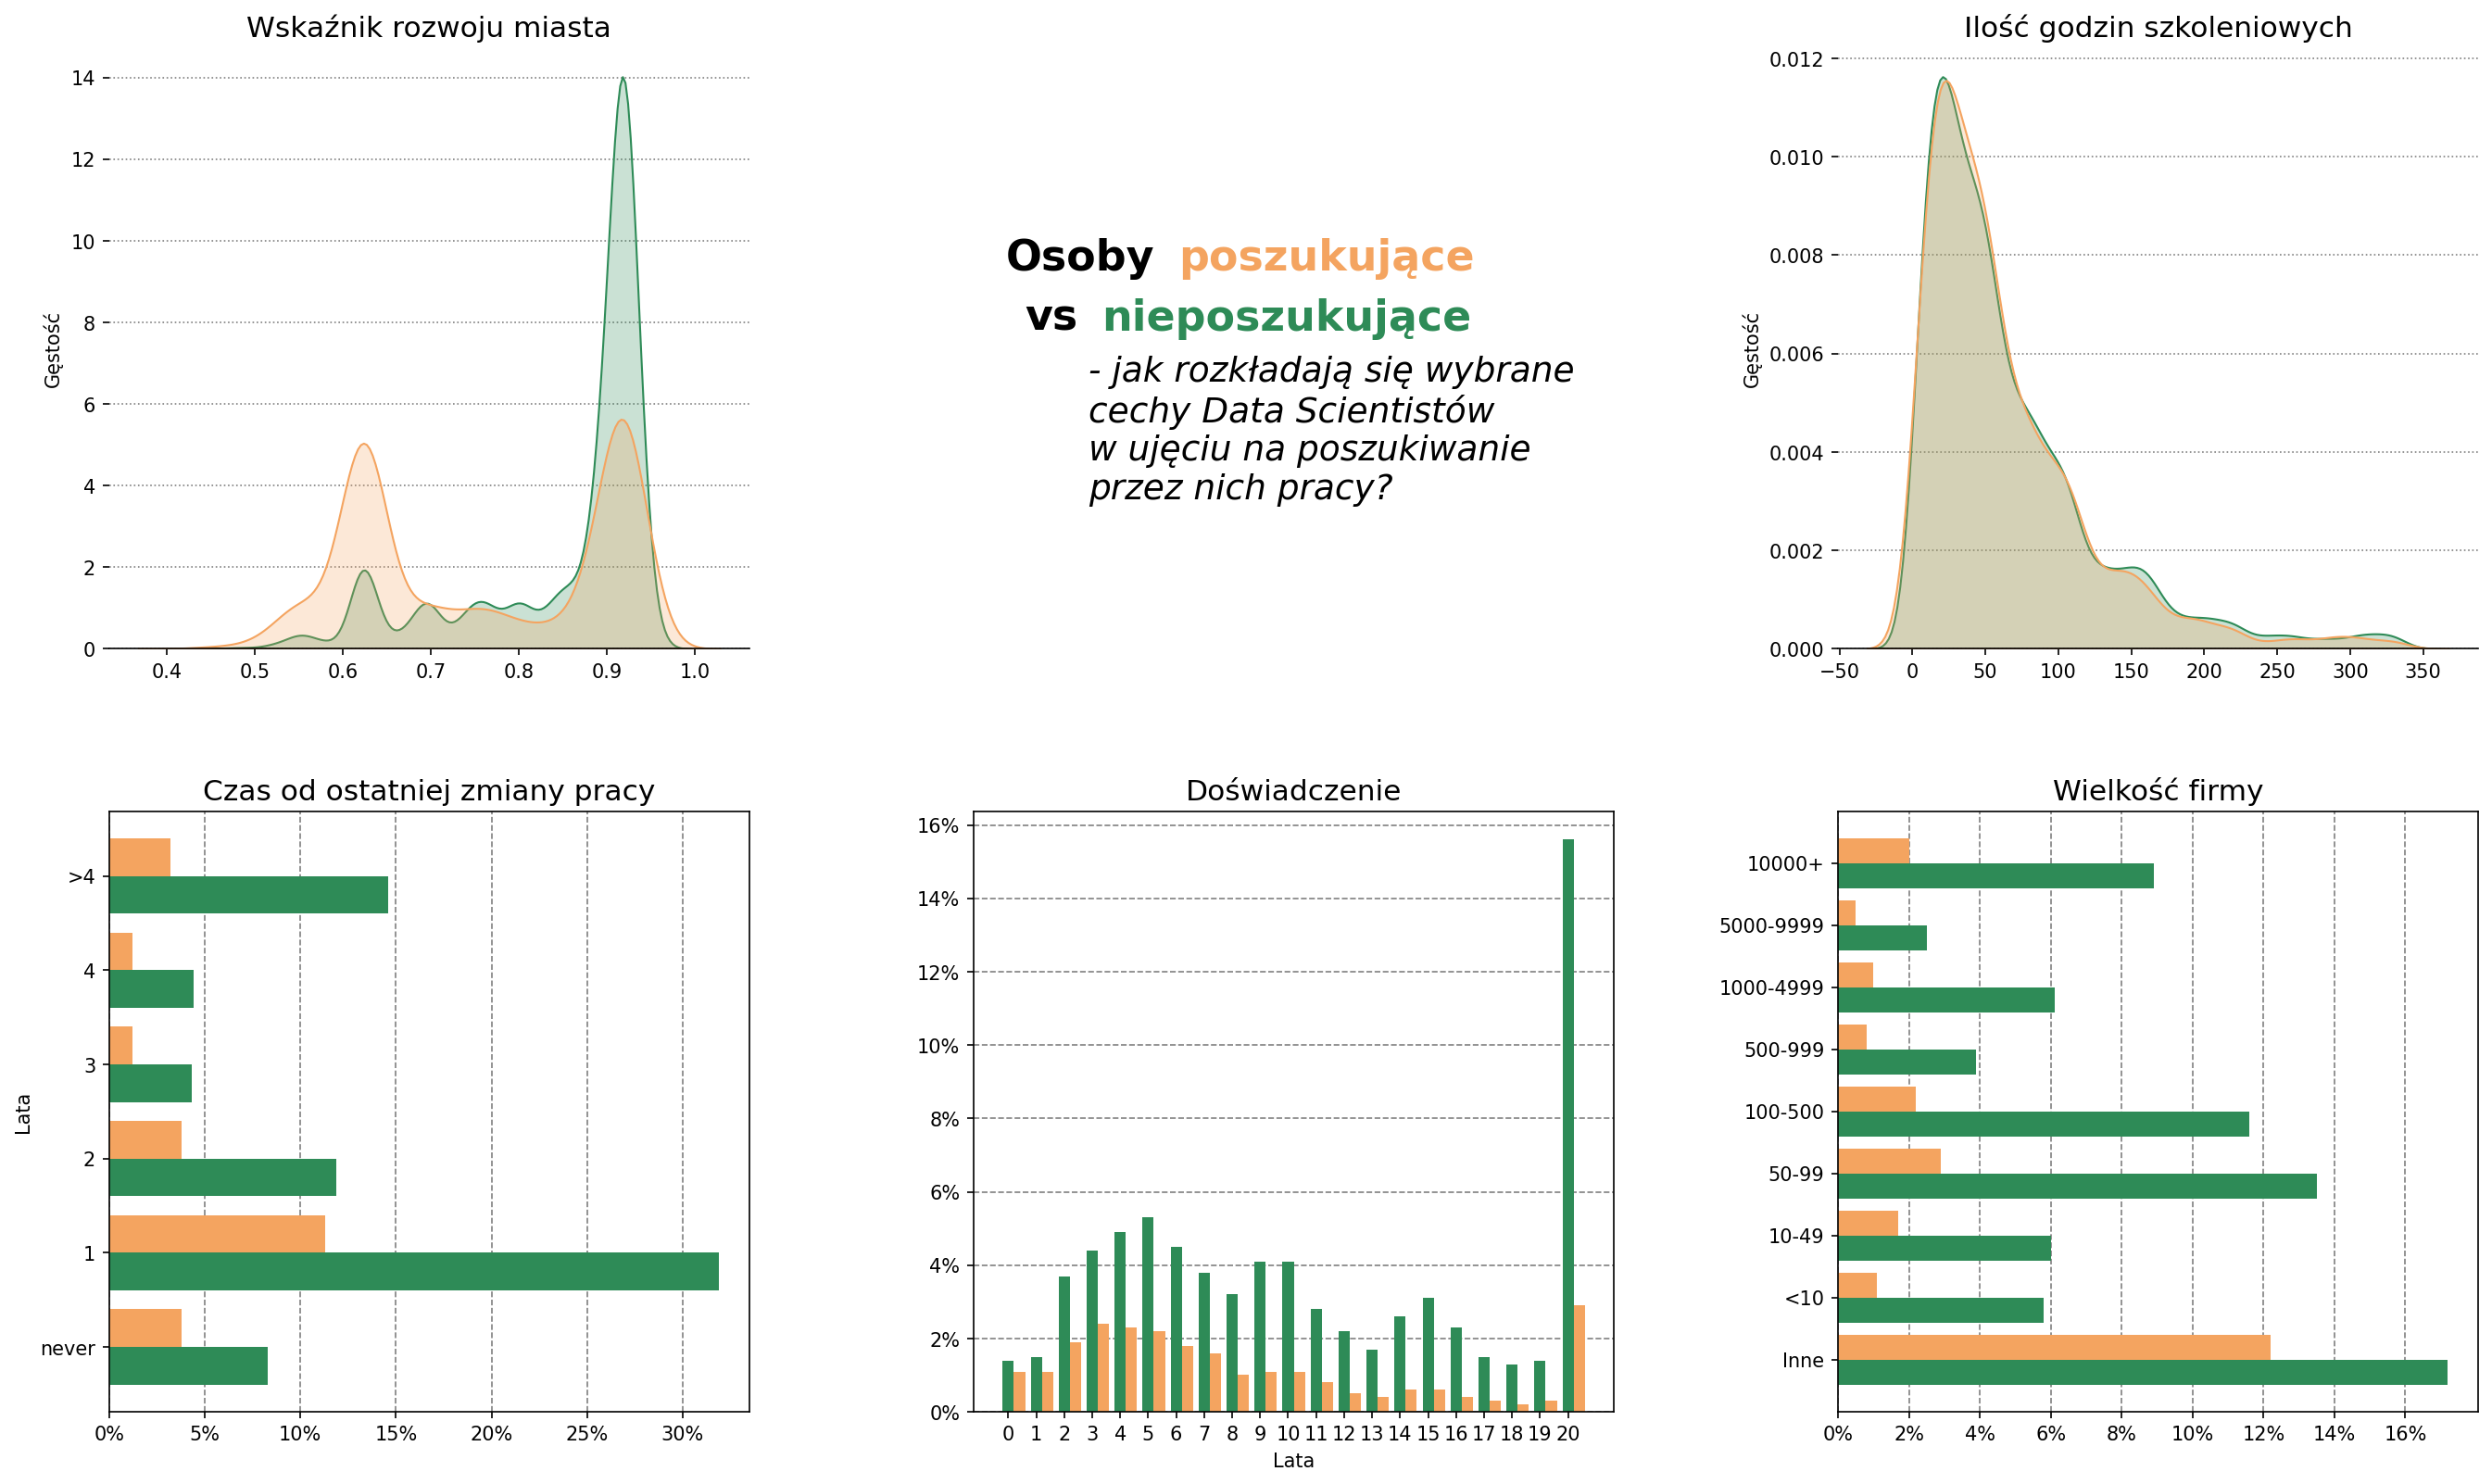

In [8]:
fig = plt.figure(figsize=(22,13),dpi=150)
fig.patch.set_facecolor('white')
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

# ax1 - tytuł wykresu
ax1.text(0.05, 0.65, 'Osoby',
         horizontalalignment='left', verticalalignment='center', fontsize=22,
         fontweight='bold', color="black")
ax1.text(0.32, 0.65, 'poszukujące',
         horizontalalignment='left', verticalalignment='center', fontsize=22,
         fontweight='bold', color="sandybrown")
ax1.text(0.08, 0.55, 'vs',
         horizontalalignment='left', verticalalignment='center', fontsize=22,
         fontweight='bold', color="black")
ax1.text(0.2, 0.55, 'nieposzukujące',
         horizontalalignment='left', verticalalignment='center', fontsize=22,
         fontweight='bold', color="seagreen")
ax1.text(0.18,0.25,"- jak rozkładają się wybrane\ncechy Data Scientistów\nw ujęciu na poszukiwanie\nprzez nich pracy?", style='italic',
         fontsize=18, color='black')
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.tick_params(left=False, bottom=False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

# ax0 - wskaźnik rozwoju miasta

sns.kdeplot(data[data['Czy poszukuje pracy?']=='Nie poszukuje']['Wskaźnik rozwoju miasta'],
            ax=ax0, color="seagreen", shade=True)
sns.kdeplot(data[data['Czy poszukuje pracy?']=='Poszukuje']['Wskaźnik rozwoju miasta'],
            ax=ax0, color="sandybrown", shade=True)
ax0.set_title('Wskaźnik rozwoju miasta', fontsize=15)
ax0.set_xlabel('')
ax0.set_ylabel('Gęstość')
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.grid(axis='y', color='grey', linestyle=':')
ax0.set_xlabel('')
ax0.set_axisbelow(True)


# ax2 - ilość godzin szkoleniowych
sns.kdeplot(data[data['Czy poszukuje pracy?']=='Nie poszukuje']['Ilość godzin szkoleniowych'],
            ax=ax2, color="seagreen", shade=True)
sns.kdeplot(data[data['Czy poszukuje pracy?']=='Poszukuje']['Ilość godzin szkoleniowych'],
            ax=ax2, color="sandybrown", shade=True)
ax2.set_title('Ilość godzin szkoleniowych', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Gęstość')
ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.grid(axis='y', color='grey', linestyle=':')
ax2.set_xlabel('')
ax2.set_axisbelow(True)

# ax4 - lata doświadczenia
custom_order = {str(i): j for (i, j) in enumerate(range(0,21,1))}
# poszukuje
x_poszukuje=data[data['Czy poszukuje pracy?']=='Poszukuje']['Doświadczenie'].value_counts()
y=len(data)
percent_poszukuje=pd.DataFrame(((x_poszukuje/y)).round(3)*100)
percent_poszukuje['typ'] = percent_poszukuje.index
percent_poszukuje.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent_poszukuje.drop('typ', axis=1, inplace=True)
percent_poszukuje = percent_poszukuje['Doświadczenie']

# nie poszukuje
x_nie_poszukuje=data[data['Czy poszukuje pracy?']=='Nie poszukuje']['Doświadczenie'].value_counts()
y=len(data)
percent_nie_poszukuje=pd.DataFrame(((x_nie_poszukuje/y)).round(3)*100)
percent_nie_poszukuje['typ'] = percent_nie_poszukuje.index
percent_nie_poszukuje.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent_nie_poszukuje.drop('typ', axis=1, inplace=True)
percent_nie_poszukuje = percent_nie_poszukuje['Doświadczenie']

ax4.bar(percent_nie_poszukuje.index, height=percent_nie_poszukuje, color="seagreen", width=0.4)
ax4.bar(pd.Series(percent_poszukuje.index).apply(lambda x: int(x))+0.4,
        height=percent_poszukuje, color="sandybrown", width=0.4)
ax4.set_xlabel('Lata')
ax4.set_yticks([i for i in range(0,18,2)], [f'{i}%' for i in range(0,18,2)])
ax4.set_title('Doświadczenie', fontsize=15)
ax4.grid(axis='y', color='grey', linestyle='--')
ax4.set_axisbelow(True)

# ax5 - czas od ostatniej zmiany pracy
custom_order={'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5}
x_poszukuje=data[data['Czy poszukuje pracy?']=='Poszukuje']['Czas od ostatniej zmiany pracy'].value_counts()
y=len(data)
percent_poszukuje=pd.DataFrame(((x_poszukuje/y)).round(3)*100)
percent_poszukuje['typ'] = percent_poszukuje.index
percent_poszukuje.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent_poszukuje.drop('typ', axis=1, inplace=True)
percent_poszukuje = percent_poszukuje['Czas od ostatniej zmiany pracy']

x_nie_poszukuje=data[data['Czy poszukuje pracy?']=='Nie poszukuje']['Czas od ostatniej zmiany pracy'].value_counts()
y=len(data)
percent_nie_poszukuje=pd.DataFrame(((x_nie_poszukuje/y)).round(3)*100)
percent_nie_poszukuje['typ'] = percent_nie_poszukuje.index
percent_nie_poszukuje.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent_nie_poszukuje.drop('typ', axis=1, inplace=True)
percent_nie_poszukuje = percent_nie_poszukuje['Czas od ostatniej zmiany pracy']

positioning = pd.Series([i for i in range(0,6,1)])

ax3.barh(positioning, percent_nie_poszukuje, height=0.4, color='seagreen')
ax3.barh(positioning+0.4, percent_poszukuje, height=0.4, color='sandybrown')
ax3.set_title('Czas od ostatniej zmiany pracy', fontsize=15)
ax3.set_yticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2], custom_order.keys())
ax3.set_xticks([i for i in range(0,31,5)], [f'{i}%' for i in range(0,31,5)])
ax3.grid(axis='x', color='grey', linestyle='--')
ax3.set_axisbelow(True)
ax3.set_ylabel('Lata')


# ax6 - wielkość firmy
custom_order = {'Inne': 0, '<10': 1, '10-49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6,
         '5000-9999': 7, '10000+': 8}
x_poszukuje=data[data['Czy poszukuje pracy?']=='Poszukuje']['Wielkość firmy'].value_counts()
y=len(data)
percent_poszukuje=pd.DataFrame(((x_poszukuje/y)).round(3)*100)
percent_poszukuje['typ'] = percent_poszukuje.index
percent_poszukuje.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent_poszukuje.drop('typ', axis=1, inplace=True)
percent_poszukuje = percent_poszukuje['Wielkość firmy']

x_nie_poszukuje=data[data['Czy poszukuje pracy?']=='Nie poszukuje']['Wielkość firmy'].value_counts()
y=len(data)
percent_nie_poszukuje=pd.DataFrame(((x_nie_poszukuje/y)).round(3)*100)
percent_nie_poszukuje['typ'] = percent_nie_poszukuje.index
percent_nie_poszukuje.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
percent_nie_poszukuje.drop('typ', axis=1, inplace=True)
percent_nie_poszukuje = percent_nie_poszukuje['Wielkość firmy']

positioning = pd.Series([i for i in range(0,9,1)])

ax5.barh(positioning, percent_nie_poszukuje, height=0.4, color='seagreen')
ax5.barh(positioning+0.4, percent_poszukuje, height=0.4, color='sandybrown')
ax5.set_title('Wielkość firmy', fontsize=15)
ax5.set_yticks([0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2], custom_order.keys())
ax5.set_xticks([i for i in range(0,18,2)], [f'{i}%' for i in range(0,18,2)])
ax5.grid(axis='x', color='grey', linestyle='--')
ax5.set_axisbelow(True)


plt.show()

Najważniejsze komentarze:
- osoby poszukujące pracy dominują zarówno w miastach średnio rozwiniętych, jak i wysoko rozwiniętych
- rozkład wykonanych godzin szkoleniowych dla osób poszukujących i nie poszukujących pracy prezentuje się identycznie

## 2.4. Tabela kontyngencji pomiędzy wielkością firmy a doświadczeniem pracowników

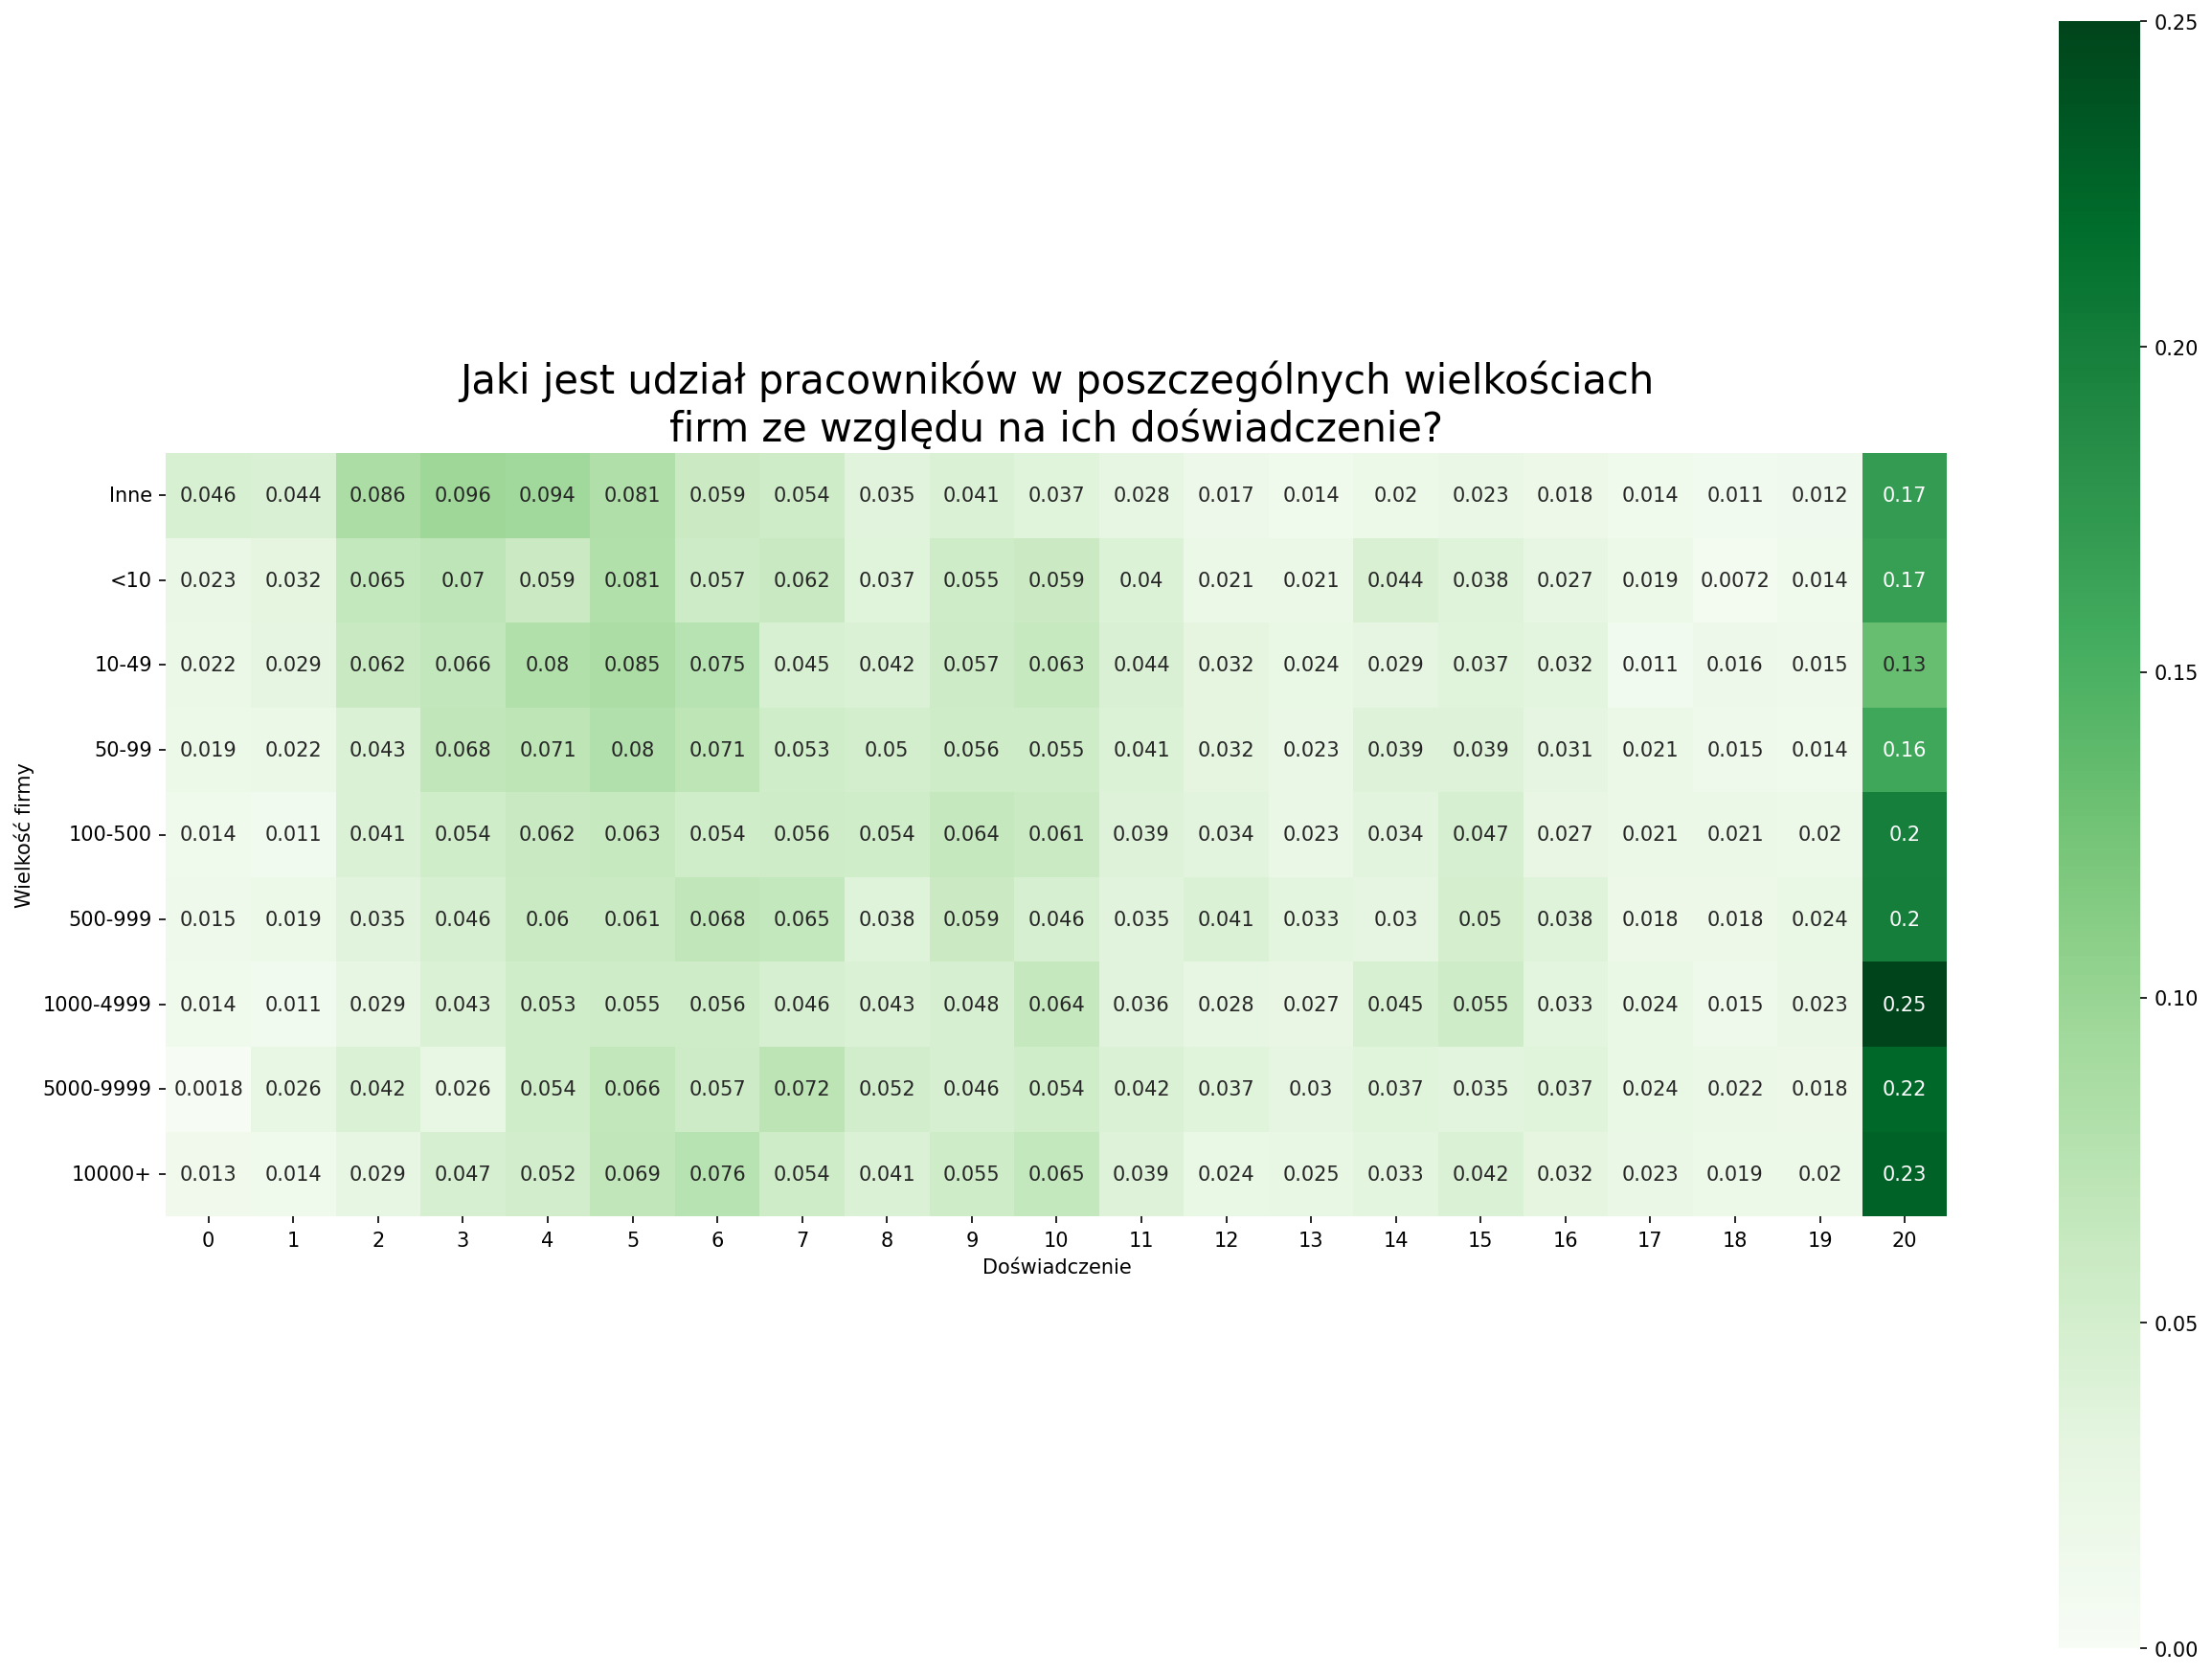

In [9]:
data_crosstab = pd.crosstab(data['Wielkość firmy'],
                            data['Doświadczenie'], 
                             ).apply(lambda r: r/r.sum(), axis=1)

data_crosstab = data_crosstab[[f'{i}' for i in range(0,21,1)]]

custom_order = {'Inne': 0, '<10': 1, '10-49': 2, '50-99': 3, '100-500': 4, '500-999': 5, '1000-4999': 6,
         '5000-9999': 7, '10000+': 8}
data_crosstab['typ'] = data_crosstab.index
data_crosstab.sort_values(by='typ', key= lambda x: x.map(custom_order), inplace=True)
data_crosstab.drop('typ', axis=1, inplace=True)

fig = plt.figure(num=None, figsize=(20, 15), dpi=150, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sns.heatmap(data_crosstab, annot=True, cmap='Greens', vmin=0.0, vmax=0.25)
plt.title('Jaki jest udział pracowników w poszczególnych wielkościach\nfirm ze względu na ich doświadczenie?',
fontsize=20)


plt.show()

Komentarz:
- osoby z największym doświadczeniem dominują we wszystkich wielkościach firm